# Day 2
Fuente:

**BTC/EUR**: https://es.finance.yahoo.com/quote/BTC-EUR/history/

**IBEX35**: https://es.finance.yahoo.com/quote/%5EIBEX/history

In [35]:
import pandas as pd

## BTC/EUR

In [36]:
df_btc_eur = pd.read_csv("BTC-EUR.csv")

In [37]:
df_btc_eur.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-02,26200.447266,26503.300781,26038.351563,26143.123047,26143.123047,10008255691
1,2023-04-03,26190.798828,26242.431641,25746.605469,26103.367188,26103.367188,11371573698
2,2023-04-04,26088.345703,26207.369141,25016.271484,25479.769531,25479.769531,17930593363
3,2023-04-05,25484.402344,26048.492188,25385.251953,25706.507813,25706.507813,13948838292
4,2023-04-06,25708.001953,26218.404297,25511.515625,25843.804688,25843.804688,15639753287


In [38]:
df_btc_eur.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [39]:
print(f"BTC/EUR\nFecha minima: {df_btc_eur["Date"].max()}\nFecha maxima: {df_btc_eur["Date"].min()}")

BTC/EUR
Fecha minima: 2024-04-02
Fecha maxima: 2023-04-02


## IBEX35

In [40]:
df_ibex_35 = pd.read_csv("IBEX.csv")

In [41]:
df_ibex_35.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,9217.799805,9233.500000,9135.500000,9157.400391,9157.400391,129264000
1,2023-04-04,9174.799805,9257.500000,9168.500000,9183.200195,9183.200195,120081300
2,2023-04-05,9202.099609,9254.599609,9196.500000,9254.599609,9254.599609,140130100
3,2023-04-06,9252.799805,9323.500000,9232.599609,9312.299805,9312.299805,128321400
4,2023-04-11,9355.099609,9378.400391,9227.099609,9237.700195,9237.700195,154539500


In [42]:
df_ibex_35.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [43]:
print(f"BTC/EUR\nFecha minima: {df_ibex_35["Date"].max()}\nFecha maxima: {df_ibex_35["Date"].min()}")

BTC/EUR
Fecha minima: 2024-04-02
Fecha maxima: 2023-04-03


In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [45]:
df_btc_eur['Date'] = pd.to_datetime(df_btc_eur['Date'])
df_ibex_35['Date'] = pd.to_datetime(df_ibex_35['Date'])

In [46]:
df_btc_eur.sort_values('Date', inplace=True)
df_ibex_35.sort_values('Date', inplace=True)

In [47]:
# Obtener datos cada 15 días
btc_eur_df_15 = df_btc_eur.iloc[::15, :]
ibex_df_15 = df_ibex_35.iloc[::15, :]

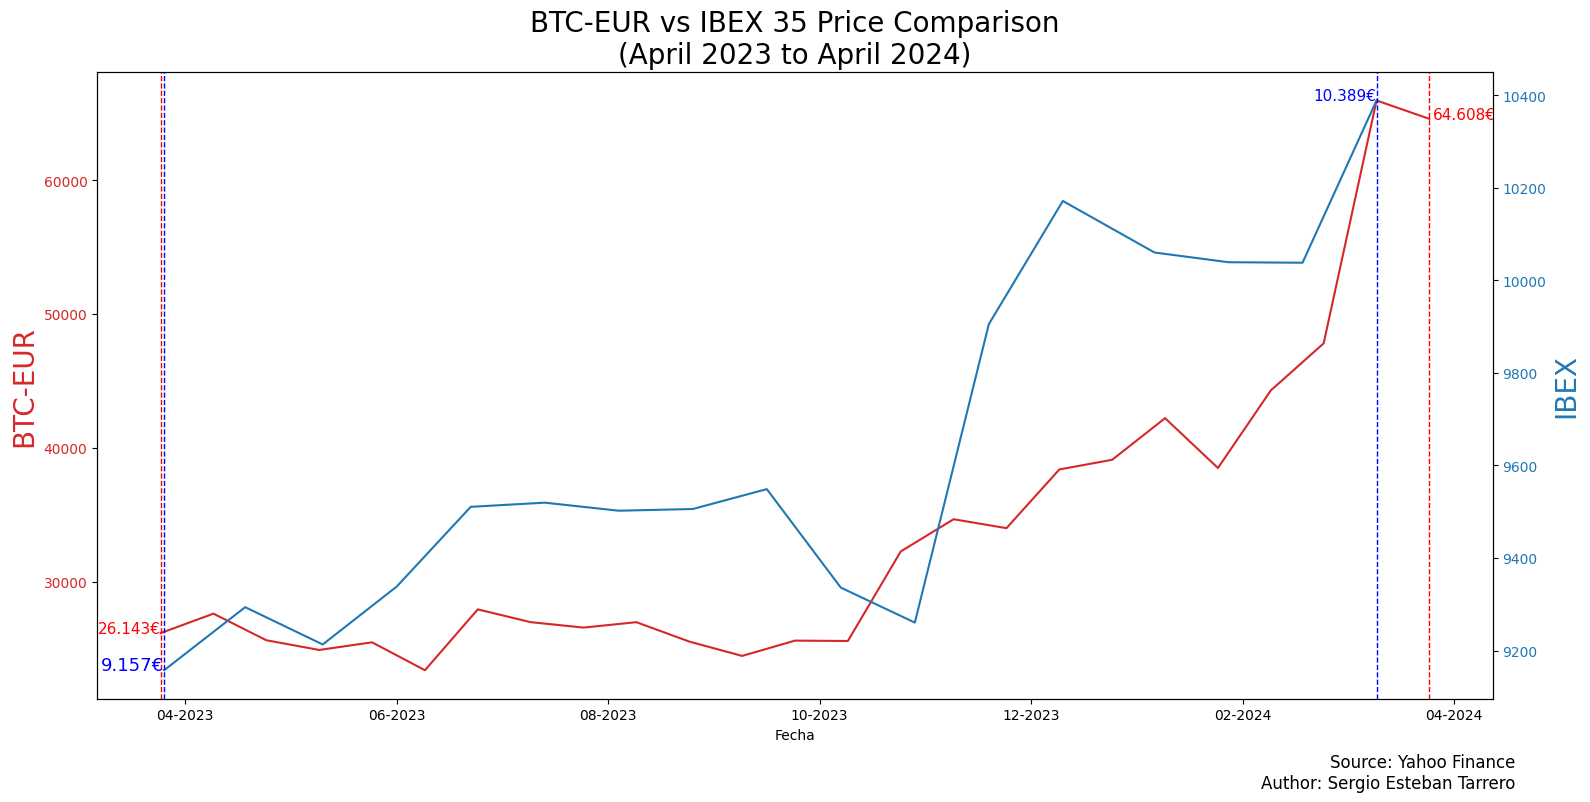

In [48]:
fig, ax1 = plt.subplots(figsize=(16, 7))

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('BTC-EUR', color=color, fontsize=20)
ax1.plot(btc_eur_df_15['Date'], btc_eur_df_15['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=60))

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('IBEX', color=color, fontsize=20)
ax2.plot(ibex_df_15['Date'], ibex_df_15['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

## Marcar el primer y último día de cada gráfico
ax1.axvline(x=btc_eur_df_15['Date'].iloc[0], color='red', linestyle='--', lw=1)
ax1.axvline(x=btc_eur_df_15['Date'].iloc[-1], color='red', linestyle='--', lw=1)
ax2.axvline(x=ibex_df_15['Date'].iloc[0], color='blue', linestyle='--', lw=1)
ax2.axvline(x=ibex_df_15['Date'].iloc[-1], color='blue', linestyle='--', lw=1)

## Mostrar el valor de cierre de al inicio y al final
ax1.text(btc_eur_df_15['Date'].iloc[0], btc_eur_df_15['Close'].iloc[0], f"{btc_eur_df_15['Close'].iloc[0]:,.0f}€".replace(',', '.'), fontsize=11, ha='right', color='red')
ax1.text(btc_eur_df_15['Date'].iloc[-1] + pd.Timedelta(days=1), btc_eur_df_15['Close'].iloc[-1], f"{btc_eur_df_15['Close'].iloc[-1]:,.0f}€".replace(',', '.'), fontsize=11, ha='left', color='red')
ax2.text(ibex_df_15['Date'].iloc[0], ibex_df_15['Close'].iloc[0], f"{ibex_df_15['Close'].iloc[0]:,.0f}€".replace(',', '.'), fontsize=13, ha='right', color='blue')
ax2.text(ibex_df_15['Date'].iloc[-1], ibex_df_15['Close'].iloc[-1], f"{ibex_df_15['Close'].iloc[-1]:,.0f}€".replace(',', '.'), fontsize=11, ha='right', color='blue')

# Añadir fuente
plt.figtext(0.95, -0.05, 'Source: Yahoo Finance\nAuthor: Sergio Esteban Tarrero', horizontalalignment='right', verticalalignment='bottom', fontsize=12)

fig.tight_layout()
plt.xticks(rotation=45)
plt.title('BTC-EUR vs IBEX 35 Price Comparison\n(April 2023 to April 2024)', fontsize=20)
plt.savefig('SergioEstebanTarreroDay2.png')
plt.show()